# Setup environment

In [1]:
### import libraries
import numpy as np
import matplotlib.pyplot as plt

### setting
plt.style.use("seaborn-whitegrid")

# Input Data

In [2]:
x_data = np.array([ 338., 333., 328., 207., 226., 25., 179., 60., 208.,  606.])
y_data = np.array([ 640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.])

visualize the data

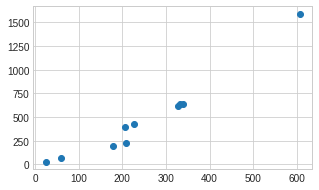

In [3]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(5, 3))
ax.scatter(x_data, y_data)
pass

# Loss function: Define goodness of a function

In [4]:
def loss(xs, ys, w, b):
    """loss function based on given w and b"""
    yhats   = b + w * xs
    errs    = yhats - ys
    err_ssq = np.sum(np.square(errs))
    return err_ssq

calculate the loss of all pairs of bias and weight

In [5]:
bs = np.arange(-200, -100, 1)    # bias
ws = np.arange(-5,   5,    0.1)  # weight

B, W = np.meshgrid(bs, ws)
L    = np.zeros((len(bs), len(ws)))

for idx1 in range(len(bs)):
    for idx2 in range(len(ws)):
        b = B[idx1, idx2]
        w = W[idx1, idx2]
        L[idx1, idx2] = loss(x_data, y_data, w, b)

visualize the loss function

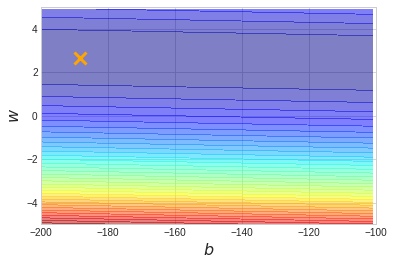

In [6]:
plt.contourf(B, W, L, 50, alpha = 0.5, cmap = plt.get_cmap("jet"))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color="orange")

plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$', fontsize = 16)
plt.ylabel(r'$w$', fontsize = 16)
pass

# Gradient Descent

$$L(w, b) = \sum^{10}_{n=1} \Big(y^n - (b + w * x^n_{cp})\Big)^2$$
$$\frac{\partial L}{\partial w} = \sum^{10}_{n=1} 2\Big(y^n - (b + w * 
x^n_{cp})\Big)(-x^n_{cp})$$
$$\frac{\partial L}{\partial b} = \sum^{10}_{n=1} 2\Big(y^n - (b + w * x^n_{cp})\Big) (-1)$$

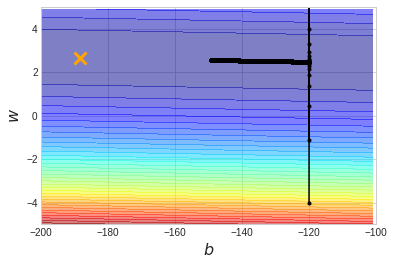

In [7]:
### initialization
b0 = -120
w0 = -4

### store all the parameters
b_history = [b0]
w_history = [w0]

### iterations
iteration = 100000

# learning rate
lr = 0.000001      

### gradient descent
b, w = b0, w0
for _ in range(iteration):
    
    # calculate the gradient
    yhats  = b + w * x_data
    errs   = y_data - yhats
    b_grad = np.sum(2 * errs * (-1.0))
    w_grad = np.sum(2 * errs * (-x_data))
    
    # update parameters
    b = b - lr * b_grad 
    w = w - lr * w_grad
    
    # store
    b_history.append(b)
    w_history.append(w)
    
### visualization
plt.contourf(B, W, L, 50, alpha = 0.5, cmap = plt.get_cmap("jet"))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color="orange")

plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')

plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$', fontsize = 16)
plt.ylabel(r'$w$', fontsize = 16)
pass

### Updated version: The learning rate of b and w are now set differently

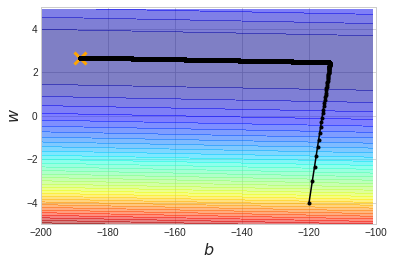

In [8]:
### initialization
b0 = -120
w0 = -4

### store all the parameters
b_history = [b0]
w_history = [w0]

### iterations
iteration = 100000

# learning rate
lr   = 1      
b_lr = 0.0
w_lr = 0.0

### gradient descent
b, w = b0, w0
for _ in range(iteration):
    
    # calculate the gradient
    yhats  = b + w * x_data
    errs   = y_data - yhats
    b_grad = np.sum(2 * errs * (-1.0))
    w_grad = np.sum(2 * errs * (-x_data))
    
    # update learning rate
    b_lr = b_lr + b_grad**2
    w_lr = w_lr + w_grad**2
    
    # update parameters
    b = b - lr/np.sqrt(b_lr) * b_grad 
    w = w - lr/np.sqrt(w_lr) * w_grad
    
    # store
    b_history.append(b)
    w_history.append(w)
    
### visualization
plt.contourf(B, W, L, 50, alpha = 0.5, cmap = plt.get_cmap("jet"))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color="orange")

plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')

plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$', fontsize = 16)
plt.ylabel(r'$w$', fontsize = 16)
pass